**Moving Average Convergence Divergence** <br/>
MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the **26-period Exponential Moving Average (EMA)** from the **12-period EMA.**

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')

In [15]:
url = 'https://query1.finance.yahoo.com/v7/finance/download/%5ENSEI?period1=1420070400&period2=1577750400&interval=1d&events=history'
df=pd.read_csv(url, header=0, parse_dates=True, index_col='Date')## header=0 takes the first line as column headers
df= df.dropna(how='any') #to drop NaN rows and columns
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900.0
2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,8378.400391,118200.0
2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,8127.350098,172800.0
2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,8102.100098,164100.0
2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,8234.599609,143800.0


In [3]:
df['EMA12'] = df['Close'].ewm(span=12).mean() #Exponential moving average
df['EMA26'] = df['Close'].ewm(span=26).mean()
df['MACD']=df['EMA12']-df['EMA26']
df['EMA9M']=df['MACD'].ewm(span=9).mean() #trigger line - 9 day EMA of the MACD

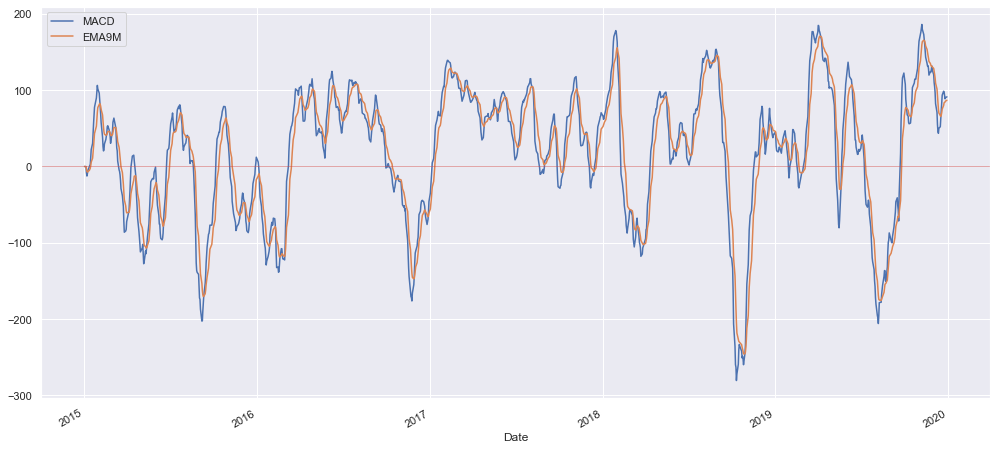

In [4]:
sns.set()
df['MACD'].plot(figsize=(17,8), legend = True)
df['EMA9M'].plot(figsize=(17,8), legend = True)
plt.axhline(y=0, color='r', linestyle='-',lw='0.5')
plt.grid(True);

In [5]:
df['Bull']=(df['MACD']>df['EMA9M']) & (df['EMA9M'].shift(1)>=df['MACD'].shift(1))
df['Bull']=df['Bull'].astype(int)
df['Bear']=(df['MACD']<df['EMA9M']) & (df['EMA9M'].shift(1)<=df['MACD'].shift(1))
df['Bear']=df['Bear'].astype(int)
df['TriggerIndicator']=[1 if df.loc[ei,'Bull']|df.loc[ei,'Bear'] 
                        else 0 for ei in df.index]
triggercrossover=df['TriggerIndicator']==1
df.head()

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,EMA9M,Bull,Bear,TriggerIndicator
Date,,,,,,,,,,,,,
2015-01-02,8288.700195,8410.599609,8288.700195,8395.450195,8395.450195,101900.0,8395.450195,8395.450195,0.000000,0.000000,0,0,0
2015-01-05,8407.950195,8445.599609,8363.900391,8378.400391,8378.400391,118200.0,8386.214884,8386.597412,-0.382528,-0.212515,0,1,1
2015-01-06,8325.299805,8327.849609,8111.350098,8127.350098,8127.350098,172800.0,8285.179899,8293.452369,-8.272471,-3.515776,0,0,0
2015-01-07,8118.649902,8151.200195,8065.450195,8102.100098,8102.100098,164100.0,8227.388760,8239.958636,-12.569876,-6.582883,0,0,0
2015-01-08,8191.399902,8243.500000,8167.299805,8234.599609,8234.599609,143800.0,8229.347922,8238.715856,-9.367934,-7.411372,0,0,0


Below, the bull signal = red vertical line and
the bear signal = green vertical line

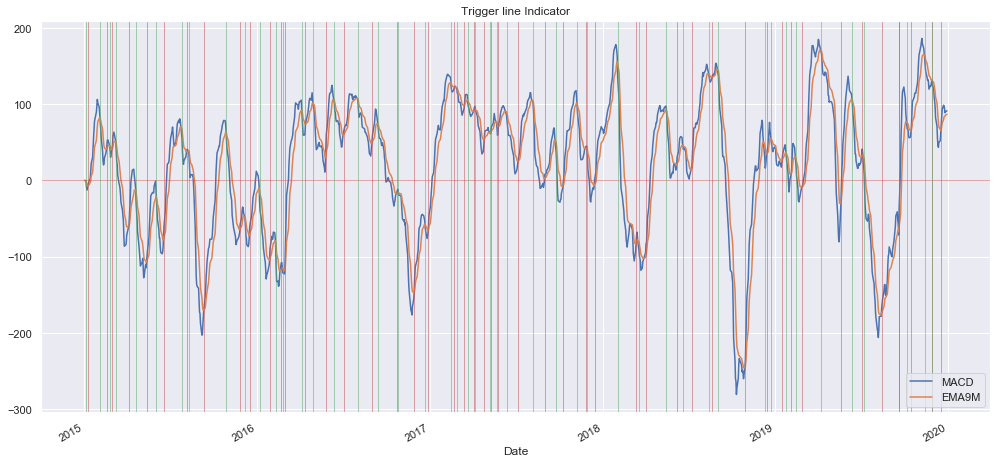

In [6]:
df['MACD'].plot(figsize=(17,8), legend = True)
df['EMA9M'].plot(figsize=(17,8), legend = True)
plt.axhline(y=0, color='r', linestyle='-',lw=0.5)
plt.grid(True);
plt.title('Trigger line Indicator')

for ei in df.index:
    if df.loc[ei,'Bull']:
        plt.axvline(x=ei,color='r',ls='-',lw=0.5)
    elif df.loc[ei,'Bear']:
        plt.axvline(x=ei,color='g',ls='-',lw=0.5) 

Including Centreline Crossovers:  
A risk free buy signal to be generated only if MACD>0 and MACD>EMA9M  
A risk free sell signal only when MACD<0 and MACD<EMA9M

Text(0.5, 1.0, 'Centre line Indicator')

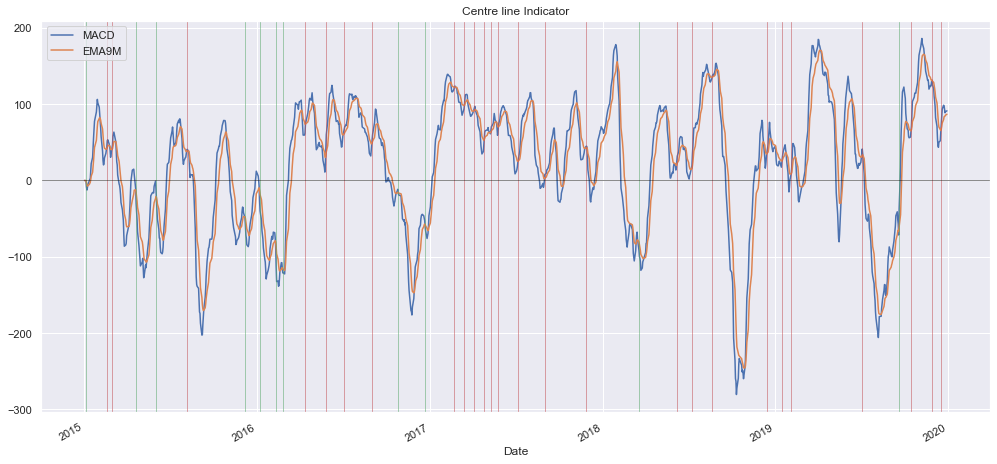

In [7]:
df['Buy']= [1 if (df.loc[ei,'Bull'] and df.loc[ei,'MACD']>0) else 0 for ei in df.index]
df['Sell']= [1 if (df.loc[ei,'Bear'] and df.loc[ei,'MACD']<0) else 0 for ei in df.index]

df['MACD'].plot(figsize=(17,8), legend = True)
df['EMA9M'].plot(figsize=(17,8), legend = True)

for ei in df.index:
    if df.loc[ei,'Buy']:
        plt.axvline(x=ei,color='r',ls='-',lw=0.5)
    elif df.loc[ei,'Sell']:
        plt.axvline(x=ei,color='g',ls='-',lw=0.5) 

plt.axhline(y=0, color='k', linestyle='-',lw=0.5)
plt.grid(True);
plt.title('Centre line Indicator')

In [8]:
df['Indicator']=[1 if df.loc[ei,'Buy']|df.loc[ei,'Sell'] else 0 for ei in df.index ]
df['Sum']=0
for j in range(1,11):
    df['Sum']+=df['Close'].shift(-j)-df['Close']
df['Mean_Return_NXT_10D']=abs(df['Sum']/(df['Close']*10))
df.tail(15)

,Open,High,Low,Close,Adj Close,Volume,EMA12,EMA26,MACD,EMA9M,Bull,Bear,TriggerIndicator,Buy,Sell,Indicator,Sum,Mean_Return_NXT_10D
Date,,,,,,,,,,,,,,,,,,
2019-12-09,11939.099609,11981.950195,11888.049805,11937.500000,11937.500000,600.0,11991.704302,11920.723321,70.980980,101.580518,0,0,0,0,0,0,1685.300782,0.014118
2019-12-10,11950.500000,11953.200195,11844.700195,11856.799805,11856.799805,700.0,11970.949764,11915.988246,54.961518,92.256718,0,0,0,0,0,0,2850.052732,0.024037
2019-12-11,11867.349609,11923.200195,11832.299805,11910.150391,11910.150391,1000.0,11961.596014,11915.555812,46.040202,83.013415,0,0,0,0,0,0,2532.946286,0.021267
2019-12-12,11944.299805,12005.500000,11934.000000,11971.799805,11971.799805,800.0,11963.165828,11919.722034,43.443794,75.099491,0,0,0,0,0,0,2190.452146,0.018297
2019-12-13,12026.400391,12098.849609,12023.599609,12086.700195,12086.700195,600.0,11982.171115,11932.090787,50.080329,70.095658,0,0,0,0,0,0,1210.597660,0.010016
2019-12-16,12131.349609,12134.650391,12046.299805,12053.950195,12053.950195,400.0,11993.214051,11941.117409,52.096641,66.495855,0,0,0,0,0,0,NaN,NaN
2019-12-17,12082.450195,12182.750000,12070.349609,12165.000000,12165.000000,500.0,12019.642658,11957.701305,61.941353,65.584955,0,0,0,0,0,0,NaN,NaN
2019-12-18,12197.000000,12237.700195,12163.450195,12221.650391,12221.650391,500.0,12050.720771,11977.253089,73.467682,67.161500,1,0,1,1,0,1,NaN,NaN
2019-12-19,12223.400391,12268.349609,12191.150391,12259.700195,12259.700195,600.0,12082.871452,11998.175097,84.696355,70.668471,0,0,0,0,0,0,NaN,NaN


In [9]:
keep_df=df[['Close','Mean_Return_NXT_10D','Indicator']] 
#slices the DataFrame: to drop last 10 columns
final_df=keep_df[:-10].round({'Close':2,'Mean_Return_NXT_10D':3})
final_df

,Close,Mean_Return_NXT_10D,Indicator
Date,,,
2015-01-02,8395.45,0.011,0
2015-01-05,8378.40,0.007,1
2015-01-06,8127.35,0.031,0
2015-01-07,8102.10,0.042,0
2015-01-08,8234.60,0.031,0
...,...,...,...
2019-12-09,11937.50,0.014,0
2019-12-10,11856.80,0.024,0
2019-12-11,11910.15,0.021,0


In [10]:
X=final_df['Indicator']
Y=final_df['Mean_Return_NXT_10D']
X1=sm.add_constant(X)
reg=sm.OLS(Y,X1).fit()
print(reg.summary())

                             OLS Regression Results                            
Dep. Variable:     Mean_Return_NXT_10D   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.1125
Date:                 Sun, 19 Jul 2020   Prob (F-statistic):              0.737
Time:                         13:30:41   Log-Likelihood:                 3778.3
No. Observations:                 1211   AIC:                            -7553.
Df Residuals:                     1209   BIC:                            -7542.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0132      0.000     42.37

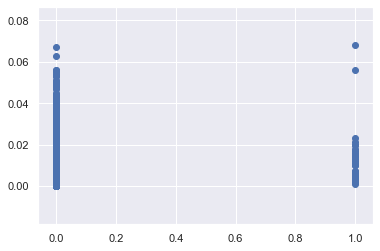

In [13]:
plt.scatter(X,Y)
plt.show()